In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns
from sklearn.cluster import KMeans

# EDA

In [3]:
data = pd.read_csv("Mall_Customers.csv")
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
data.shape

(200, 5)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [7]:
data.isna().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

# dont want customer id and gender , using only anual income and spending score

In [31]:
x = data.iloc[:,3:5].values


# Choosing the correct number of clusters

WCSS

# Elbow Method

In [21]:
# finding wcss values for diff number of clusters
wcss=[]
for i in range (1,11):
    kmeans=KMeans(n_clusters=i , init="k-means++" , random_state=42)
    kmeans.fit(x)

    wcss.append(kmeans.inertia_)

In [22]:
wcss

[269981.28,
 183653.32894736843,
 106348.37306211119,
 73880.64496247195,
 44448.45544793371,
 40825.16946386946,
 33642.57922077922,
 26686.837785187785,
 24766.471609793443,
 23103.122085983916]

# lets plot an elbow graph to determine the value of k

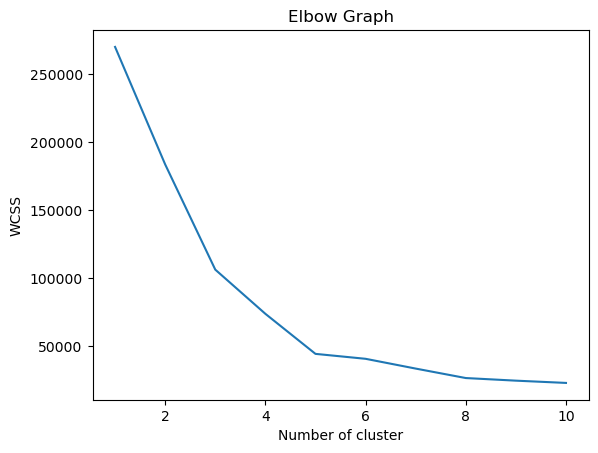

In [30]:
plt.plot(range(1,11) , wcss)
plt.xlabel("Number of cluster")
plt.ylabel("WCSS")
plt.title("Elbow Graph")
plt.show()

# looking at the elbow graph the correct number of clusters would be 5

In [40]:
model = KMeans(n_clusters=5 ,  init="k-means++" ,random_state=0)

In [41]:
model.fit(x)

KMeans(n_clusters=5, random_state=0)

In [44]:
y=model.predict(x)
y

array([3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4,
       3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 0,
       3, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 0, 1, 2, 1, 2, 1,
       0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1], dtype=int32)

# lets visualise all the clusters and centroid

Text(0, 0.5, 'Spending Score')

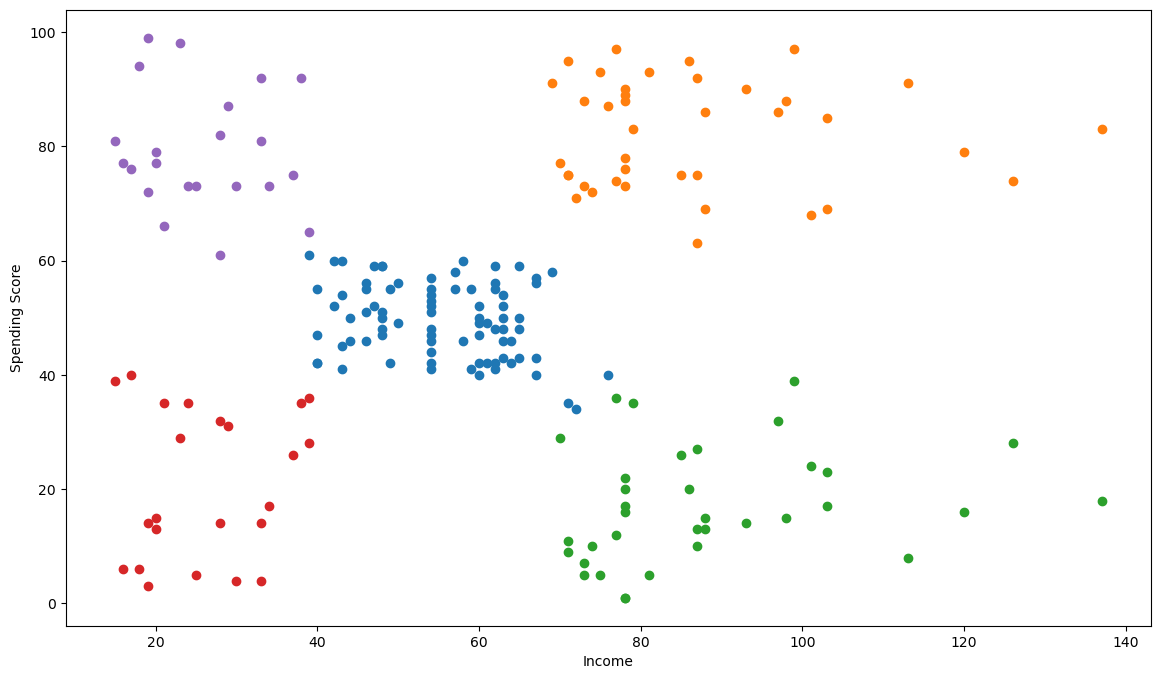

In [53]:
plt.figure(figsize=(14,8))
plt.scatter(x[y==0,0] , x[y==0,1] , label="cluster1")
plt.scatter(x[y==1,0] , x[y==1,1] , label="cluster2")
plt.scatter(x[y==2,0] , x[y==2,1] , label="cluster3")
plt.scatter(x[y==3,0] , x[y==3,1] , label="cluster4")
plt.scatter(x[y==4,0] , x[y==4,1] , label="cluster5")
plt.xlabel("Income")
plt.ylabel("Spending Score")